## Lession 6
# Adding and Updating Content

In [1]:
from arcgis.gis import GIS
gis = GIS("home")
print("Logged in as " + gis.properties.user.username + " to " + gis.properties.name)

Logged in as ryan_cooper@eagle.co.nz to ArcGIS Enterprise


### Import Content Manager

In [2]:
# import the Content Manager class in gis module
from arcgis.gis import ContentManager

# define ContentManager
cm = ContentManager(gis)

### Explore Content 

#### from a Notebook server


<Item title:"Patrol Information RJC" type:Feature Layer Collection owner:ryan_cooper@eagle.co.nz>
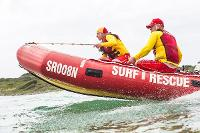

In [39]:
# Item Added From Toolbar
# Title: Patrol Information RJC | Type: Feature Service | Owner: ryan_cooper@eagle.co.nz
item = gis.content.get("2769a1dfeefc43f5996b7c2d11705d4e")
item

In [40]:
# pull out the desired layer of the feature service
layer = item.layers[0]
print (layer)

<FeatureLayer url:"https://enterprise.cloud.eaglegis.co.nz/server/rest/services/Hosted/Patrol_Information_RJC/FeatureServer/0">


In [ ]:
# layer.properties.ispublic?

In [41]:
# get the properties of the layer
print (layer.properties.extent.spatialReference)

{
  "wkid": 4326,
  "latestWkid": 4326,
  "xyTolerance": 8.983152841195215e-09,
  "zTolerance": 0.001,
  "mTolerance": 0.001,
  "falseX": -400,
  "falseY": -400,
  "xyUnits": 999999999.9999999,
  "falseZ": -100000,
  "zUnits": 10000,
  "falseM": -100000,
  "mUnits": 10000
}


In [42]:
# query the layer - I want to return all layers
featureSet = layer.query()
print (featureSet)

{"features": [{"geometry": {"x": 174.65403600000002, "y": -37.283477999999945}, "attributes": {"objectid": 14, "id": 14, "beach": "Kariaotahi", "patrol": "Patrolled by Kariaotahi SLSC.", "longitude": 174.654036, "latitude": -37.283478, "vistors": 350, "rescues": 8, "minor": 7, "major": 0, "cpr": 0, "casualties": 0}}, {"geometry": {"x": 174.7525690000001, "y": -36.68886299999997}, "attributes": {"objectid": 16, "id": 16, "beach": "Long Bay", "patrol": "Patrolled by Regional Guards.", "longitude": 174.752569, "latitude": -36.688863, "vistors": 1110, "rescues": 8, "minor": 5, "major": 1, "cpr": 0, "casualties": 0}}, {"geometry": {"x": 174.7948520000001, "y": -41.33000899999996}, "attributes": {"objectid": 17, "id": 17, "beach": "Lyall Bay", "patrol": "Patrolled by Lyall Bay SLSC.", "longitude": 174.794852, "latitude": -41.330009, "vistors": 1470, "rescues": 14, "minor": 4, "major": 8, "cpr": 7, "casualties": 0}}, {"geometry": {"x": 176.1833670000001, "y": -37.63292599999994}, "attributes"

In [43]:
# explore the features within the feature set
features = featureSet.features
print (features[0])

{"geometry": {"x": 174.65403600000002, "y": -37.283477999999945}, "attributes": {"objectid": 14, "id": 14, "beach": "Kariaotahi", "patrol": "Patrolled by Kariaotahi SLSC.", "longitude": 174.654036, "latitude": -37.283478, "vistors": 350, "rescues": 8, "minor": 7, "major": 0, "cpr": 0, "casualties": 0}}


### Read in Weekly Surf Reports

In [44]:
import pandas as pd

In [45]:
surfReport_CSV = '/arcgis/home/Week1.csv'

surfReport = pd.read_csv(surfReport_CSV)

# Using both Pandas and Jupyter Notebooks we can print the sheet
surfReport.head()

,ID,Beach,Patrol,Longitude,Latitude,Vistors,Rescues,Minor,Major,CPR,Casualties
0,1,Ahipara,Patrolled by Far North SLSC.,173.134747,-35.176439,50,1,0,0,0,0
1,2,Baylys,Patrolled by Regional Guards.,173.743372,-35.953805,30,2,0,0,0,0
2,3,Bethells,Patrolled by Bethells Beach SLSC.,174.444265,-36.894655,110,8,6,0,0,0
3,4,Brighton,Patrolled by Brighton SLSC.,170.329038,-45.950463,170,12,8,0,0,0
4,5,Browns Bay,Patrolled by Regional Guards.,174.750381,-36.712794,1280,16,9,5,2,0


### Update a Data in a Feature Service

In [46]:
# create an empty list that will contain the info for all our features that we are going to update
myFeatures = []

for f in features:
    for index, row in surfReport.iterrows():
        if f.attributes['id'] == (row['ID']):
            
            # create empty dictionaries that we will store our Attributes and Geometry in.
            myAttributes = {}
            myGeometry = {}
            
            # confirm the object id
            myAttributes['objectid'] = f.attributes['id']
            
            # confirm the location data
            myGeometry['x'] = f.geometry['x']
            myGeometry['y'] = f.geometry['y']

            # pull out the data for each location
            myAttributes['beach'] = f.attributes['beach']
            myAttributes['patrol'] = f.attributes['patrol']
            myAttributes['vistors'] = f.attributes['vistors'] + (row['Vistors'])
            myAttributes['rescues'] = f.attributes['rescues'] + (row['Rescues'])
            myAttributes['minor'] = f.attributes['minor'] + (row['Minor'])
            myAttributes['major'] = f.attributes['major'] + (row['Major'])
            myAttributes['cpr'] = f.attributes['cpr'] + (row['CPR'])
            myAttributes['casualties'] = f.attributes['casualties'] + (row['Casualties'])
            
            newFeature = {"geometry": myGeometry, "attributes": myAttributes}
            myFeatures.append(newFeature)
            
layer.edit_features(updates=myFeatures)  

{'addResults': [],
 'updateResults': [{'objectId': 14, 'success': True},
  {'objectId': 16, 'success': True},
  {'objectId': 17, 'success': True},
  {'objectId': 18, 'success': True},
  {'objectId': 19, 'success': True},
  {'objectId': 20, 'success': True},
  {'objectId': 21, 'success': True},
  {'objectId': 22, 'success': True},
  {'objectId': 1, 'success': True},
  {'objectId': 2, 'success': True},
  {'objectId': 3, 'success': True},
  {'objectId': 4, 'success': True},
  {'objectId': 5, 'success': True},
  {'objectId': 6, 'success': True},
  {'objectId': 7, 'success': True},
  {'objectId': 8, 'success': True},
  {'objectId': 9, 'success': True},
  {'objectId': 10, 'success': True},
  {'objectId': 11, 'success': True},
  {'objectId': 12, 'success': True},
  {'objectId': 13, 'success': True},
  {'objectId': 15, 'success': True},
  {'objectId': 28, 'success': True},
  {'objectId': 29, 'success': True},
  {'objectId': 30, 'success': True},
  {'objectId': 31, 'success': True},
  {'objectI